In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import os
import re

In [2]:
# Especifica el directorio donde están los archivos CSV
carpeta ="../data/raw/"

# Obtén la lista de todos los archivos en la carpeta
archivos = os.listdir(carpeta)
archivos

['RefBldgFullServiceRestaurantNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Belleville-Scott.csv',
 'RefBldgFullServiceRestaurantNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Cahokia.csv',
 'RefBldgFullServiceRestaurantNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Carbondale-Southern.csv',
 'RefBldgFullServiceRestaurantNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE_Aurora.Muni.csv',
 'RefBldgFullServiceRestaurantNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE_Bloomington.csv',
 'RefBldgHospitalNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Belleville-Scott.csv',
 'RefBldgHospitalNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Cahokia.csv',
 'RefBldgHospitalNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Carbondale-Southern.csv',
 'RefBldgHospitalNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE_Aurora.Muni.csv',
 'RefBldgHospitalNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE_Bloomington.csv',
 'RefBldgLargeHotelNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Belleville-Scott.csv',
 'RefBldgLargeHotelNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Cahokia.csv',
 'RefBldgLargeHotelNew2004_v1.3_

In [3]:
prueba=pd.read_csv("../data/raw/RefBldgFullServiceRestaurantNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Belleville-Scott.csv")
prueba.head()

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
0,01/01 01:00:00,22.453919,3.998243,0.000733,0.0,4.589925,8.1892,141.366183,131.097222,3.33988,6.929081
1,01/01 02:00:00,14.637149,0.000000,0.000000,0.0,1.529975,7.4902,3.931971,0.000000,3.33988,0.592091
2,01/01 03:00:00,14.651183,0.000000,0.000000,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000
3,01/01 04:00:00,14.657947,0.000000,0.000000,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000
4,01/01 05:00:00,14.806050,0.000000,0.000000,0.0,1.529975,7.4902,3.931942,0.000000,3.33988,0.592062


In [4]:
# Define the columns to keep
columns_to_keep = [
    'Date/Time',
    'Electricity:Facility [kW](Hourly)',
    'Fans:Electricity [kW](Hourly)',
    'Cooling:Electricity [kW](Hourly)',
    'Heating:Electricity [kW](Hourly)',
    'InteriorLights:Electricity [kW](Hourly)',
    'InteriorEquipment:Electricity [kW](Hourly)'
]
# Load and concatenate data from all files
dfs = []
for file in archivos:
    df = pd.read_csv(f"../data/raw/{file}", usecols=columns_to_keep)
    df["Date/Time"] = '2004 ' + df["Date/Time"]
    date_format = '%Y %m/%d %H:%M:%S'
    df["Date/Time"] = pd.to_datetime(df["Date/Time"], format=date_format, errors='coerce')
    match = re.match(r'^[^_]+', file)
    name = match.group(0)
    df["type_building"] = name
    dfs.append(df)
# # Combine all dataframes into one
combined_df = pd.concat(dfs, axis=0, ignore_index=True)
# # Set Date/Time as index
# combined_df.set_index('Date/Time', inplace=True)

In [5]:
dfs[0].head()

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),type_building
0,2004-01-01 01:00:00,22.453919,3.998243,0.000733,0.0,4.589925,8.1892,RefBldgFullServiceRestaurantNew2004
1,2004-01-01 02:00:00,14.637149,0.000000,0.000000,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004
2,2004-01-01 03:00:00,14.651183,0.000000,0.000000,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004
3,2004-01-01 04:00:00,14.657947,0.000000,0.000000,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004
4,2004-01-01 05:00:00,14.806050,0.000000,0.000000,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004


In [6]:
dfs[0].tail()

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),type_building
8755,2004-12-31 20:00:00,38.653890,3.998243,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004
8756,2004-12-31 21:00:00,38.637599,3.998243,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004
8757,2004-12-31 22:00:00,38.577471,3.998243,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004
8758,2004-12-31 23:00:00,38.458116,3.998243,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004
8759,NaT,39.254839,3.998243,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004


In [7]:
# dfs[0].resample("D").sum().head()

In [73]:
# combined_df.to_csv("../data/interim/estadisticas_edificios_combinados.csv",index=False)

In [10]:
combined_df.columns

Index(['Date/Time', 'Electricity:Facility [kW](Hourly)',
       'Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'Heating:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)', 'type_building'],
      dtype='object')

In [12]:
combined_df_features=combined_df.drop(columns=["Date/Time","type_building"])
combined_df_features.head()

,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly)
0,22.453919,3.998243,0.000733,0.0,4.589925,8.1892
1,14.637149,0.000000,0.000000,0.0,1.529975,7.4902
2,14.651183,0.000000,0.000000,0.0,1.529975,7.4902
3,14.657947,0.000000,0.000000,0.0,1.529975,7.4902
4,14.806050,0.000000,0.000000,0.0,1.529975,7.4902


In [76]:
combined_df_features['Heating:Electricity [kW](Hourly)'].median()

0.0

In [77]:
combined_df_features['Heating:Electricity [kW](Hourly)'].describe()

count    700800.000000
mean          1.360695
std           8.425415
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         279.414618
Name: Heating:Electricity [kW](Hourly), dtype: float64

In [78]:
combined_df_features['Heating:Electricity [kW](Hourly)'].std()

8.425414850919017

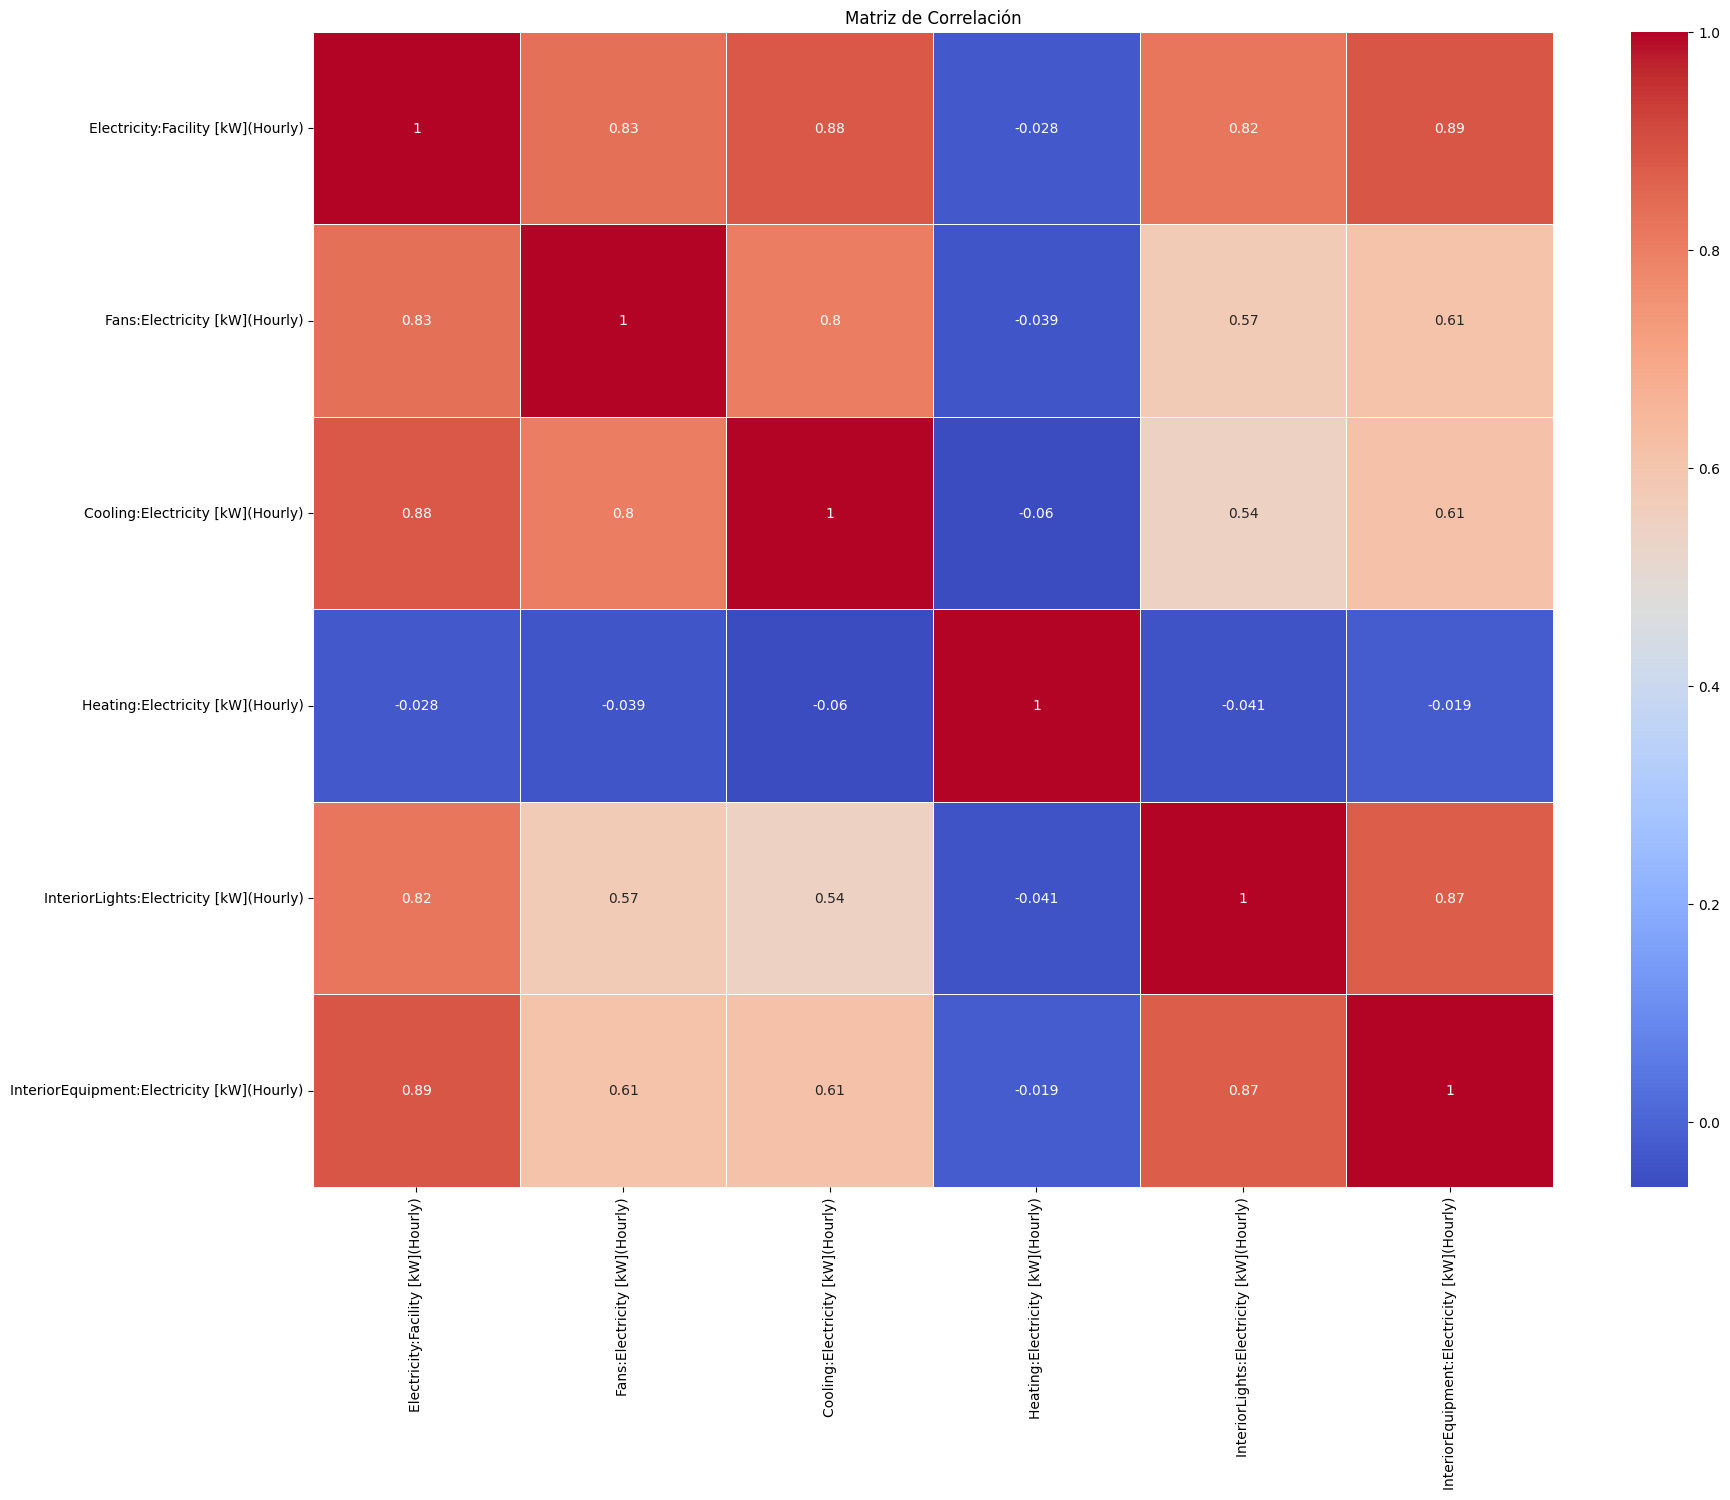

In [79]:
# Calcular la matriz de correlación
correlation_matrix = combined_df_features.corr()

# Mostrar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

**FEATURE IMPORTANCE**

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [16]:
# Separar la variable objetivo y las características
X = combined_df_features.drop(columns=['Electricity:Facility [kW](Hourly)'])
y = combined_df_features['Electricity:Facility [kW](Hourly)']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características (opcional pero recomendado para ciertos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Obtener la importancia de las características
importances = model.feature_importances_

# Crear un dataframe para visualizar mejor las importancias
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

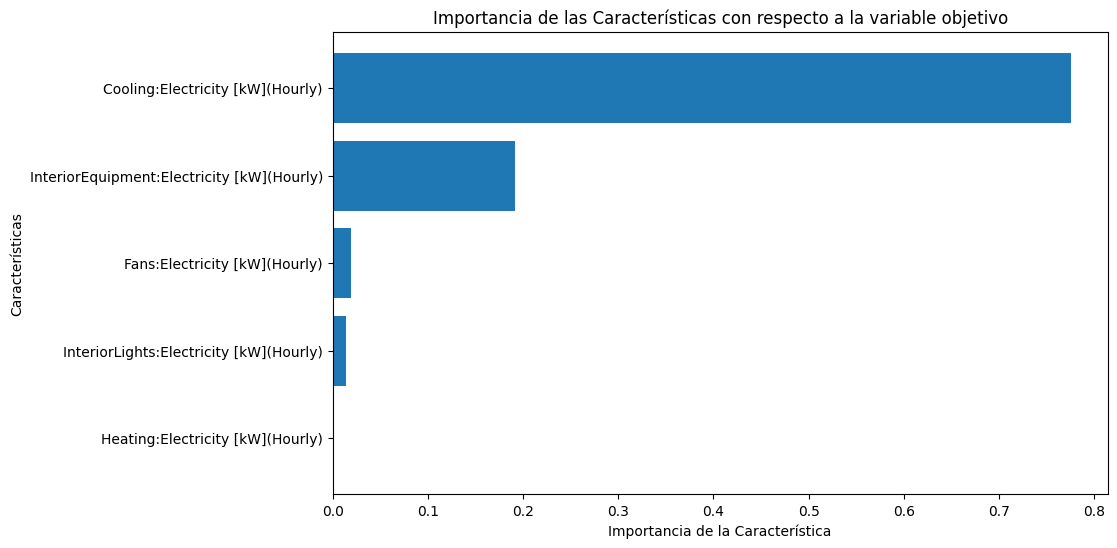

In [17]:
# Visualizar las importancias
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia de la Característica')
plt.ylabel('Características')
plt.title('Importancia de las Características con respecto a la variable objetivo')
plt.gca().invert_yaxis()
plt.show()

In [18]:
feature_importance_df

,Feature,Importance
1,Cooling:Electricity [kW](Hourly),0.775251
4,InteriorEquipment:Electricity [kW](Hourly),0.191405
0,Fans:Electricity [kW](Hourly),0.019073
3,InteriorLights:Electricity [kW](Hourly),0.013510
2,Heating:Electricity [kW](Hourly),0.000761


In [80]:
# Identificar características altamente correlacionadas (umbral > 0.9)
threshold = 0.85
high_corr_var = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_var.add(correlation_matrix.columns[i])

high_corr_var

{'Cooling:Electricity [kW](Hourly)',
 'InteriorEquipment:Electricity [kW](Hourly)'}

In [81]:
# Eliminar las características altamente correlacionadas
data_reduced = combined_df.drop(columns=high_corr_var)

# Mostrar las primeras filas del nuevo DataFrame
data_reduced.head()

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),type_building
0,2004-01-01 01:00:00,22.453919,3.998243,0.0,4.589925,RefBldgFullServiceRestaurantNew2004
1,2004-01-01 02:00:00,14.637149,0.000000,0.0,1.529975,RefBldgFullServiceRestaurantNew2004
2,2004-01-01 03:00:00,14.651183,0.000000,0.0,1.529975,RefBldgFullServiceRestaurantNew2004
3,2004-01-01 04:00:00,14.657947,0.000000,0.0,1.529975,RefBldgFullServiceRestaurantNew2004
4,2004-01-01 05:00:00,14.806050,0.000000,0.0,1.529975,RefBldgFullServiceRestaurantNew2004


In [82]:
data_reduced = data_reduced.drop(columns='Heating:Electricity [kW](Hourly)')
data_reduced

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),type_building
0,2004-01-01 01:00:00,22.453919,3.998243,4.589925,RefBldgFullServiceRestaurantNew2004
1,2004-01-01 02:00:00,14.637149,0.000000,1.529975,RefBldgFullServiceRestaurantNew2004
2,2004-01-01 03:00:00,14.651183,0.000000,1.529975,RefBldgFullServiceRestaurantNew2004
3,2004-01-01 04:00:00,14.657947,0.000000,1.529975,RefBldgFullServiceRestaurantNew2004
4,2004-01-01 05:00:00,14.806050,0.000000,1.529975,RefBldgFullServiceRestaurantNew2004
...,...,...,...,...,...
700795,2004-12-31 20:00:00,18.731037,3.315213,5.481225,RefBldgWarehouseNew2004
700796,2004-12-31 21:00:00,19.651837,4.236012,5.481225,RefBldgWarehouseNew2004
700797,2004-12-31 22:00:00,18.670624,3.254800,5.481225,RefBldgWarehouseNew2004
700798,2004-12-31 23:00:00,19.588938,4.173114,5.481225,RefBldgWarehouseNew2004


In [83]:
# Define the columns to keep
columns_to_keep = [
    'Date/Time',
    'Electricity:Facility [kW](Hourly)',
    'Fans:Electricity [kW](Hourly)',
    'InteriorLights:Electricity [kW](Hourly)'
]

# Create a dynamic mapping for new column names starting from 'var2'
new_column_names = {'Date/Time': 'Date/Time'}
new_column_names.update({col: f'var{i}' for i, col in enumerate(columns_to_keep) if col != 'Date/Time'})

# Load and concatenate data from all files
dfs = []
for file in archivos:
    df = pd.read_csv(f"../data/raw/{file}", usecols=columns_to_keep)
    df.rename(columns=new_column_names, inplace=True)
    df["Date/Time"] = '2004 ' + df["Date/Time"]
    date_format = '%Y %m/%d %H:%M:%S'
    df["Date/Time"] = pd.to_datetime(df["Date/Time"], format=date_format, errors='coerce')
    match = re.match(r'^[^_]+', file)
    name = match.group(0)
    df["type_building"] = name
    dfs.append(df)

# Concatenate all DataFrames
final_df = pd.concat(dfs, ignore_index=True)

In [84]:
dfs[0].head()

,Date/Time,var1,var2,var3,type_building
0,2004-01-01 01:00:00,22.453919,3.998243,4.589925,RefBldgFullServiceRestaurantNew2004
1,2004-01-01 02:00:00,14.637149,0.000000,1.529975,RefBldgFullServiceRestaurantNew2004
2,2004-01-01 03:00:00,14.651183,0.000000,1.529975,RefBldgFullServiceRestaurantNew2004
3,2004-01-01 04:00:00,14.657947,0.000000,1.529975,RefBldgFullServiceRestaurantNew2004
4,2004-01-01 05:00:00,14.806050,0.000000,1.529975,RefBldgFullServiceRestaurantNew2004


## preparar caracteristicas

In [85]:
# Lista para almacenar los resultados de las estadísticas
resultados = []

# Iterar sobre cada dataframe
for df in dfs:
    # Calcular estadísticas para cada columna
    stats = {
        'type_building': df['type_building'].iloc[0],  # Tomar el tipo de edificio
    }
    for column in df.columns[1:-1]:  # Excluir la columna 'type_building'
        stats[column + '_mean'] = df[column].median()
        stats[column + '_std_dev'] = df[column].std()
    # Agregar los resultados a la lista
    resultados.append(stats)

# Convertir la lista de resultados en un dataframe
df_resultados = pd.DataFrame(resultados)

In [86]:
df_resultados.to_csv("../data/interim/estadisticas_edificios.csv",index=False)

In [87]:
df_resultados.head(20)

,type_building,var1_mean,var1_std_dev,var2_mean,var2_std_dev,var3_mean,var3_std_dev
0,RefBldgFullServiceRestaurantNew2004,38.877634,13.139998,3.998243,1.490142,9.179851,2.960208
1,RefBldgFullServiceRestaurantNew2004,39.231781,13.459672,3.993560,1.488397,9.179851,2.960208
2,RefBldgFullServiceRestaurantNew2004,39.321435,13.945362,3.992549,1.488020,9.179851,2.960208
3,RefBldgFullServiceRestaurantNew2004,38.689354,12.083141,3.964785,1.477673,9.179851,2.960208
4,RefBldgFullServiceRestaurantNew2004,38.713755,12.127984,3.987958,1.486309,9.179851,2.960208
5,RefBldgHospitalNew2004,1062.855317,247.379070,96.637915,11.729592,100.150657,83.786843
6,RefBldgHospitalNew2004,1065.831694,240.083181,96.616991,13.013611,100.150657,83.786843
7,RefBldgHospitalNew2004,1066.621718,237.969995,96.596273,15.031917,100.150657,83.786843
8,RefBldgHospitalNew2004,1006.510966,262.737496,96.582145,8.236525,100.150657,83.786843
9,RefBldgHospitalNew2004,1017.678552,250.254863,96.689762,9.439897,100.150657,83.786843


In [88]:
df_resultados.describe()

,var1_mean,var1_std_dev,var2_mean,var2_std_dev,var3_mean,var3_std_dev
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,180.856123,94.554094,17.007510,7.016523,21.508703,32.807023
std,274.716614,128.967601,23.647561,9.107792,24.725756,45.157198
min,6.033994,4.002892,0.968445,0.711591,0.550005,1.196898
25%,27.533792,17.795171,2.772062,1.416750,5.451126,6.810785
50%,62.731332,40.073529,6.960570,4.100985,11.914006,16.365310
75%,197.050593,81.871898,28.420933,6.633711,23.766720,28.749189
max,1066.621718,478.877942,96.689762,37.823520,100.150657,178.686652
